In [1]:
import pandas as pd

#Import dataset
bf_data = pd.read_csv(bf_file)

ImportError: No module named 'pandas'

In [2]:
#Split x and y data
x_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
y_col = ['Purchase']

x_data = bf_data[x_cols]
y_data = bf_data[y_col]
x_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,NaN,NaN
3,F,0-17,10,A,2,0,12,14.0,NaN
4,M,55+,16,C,4+,0,8,NaN,NaN
5,M,26-35,15,A,3,0,1,2.0,NaN
6,M,46-50,7,B,2,1,1,8.0,17.0
7,M,46-50,7,B,2,1,1,15.0,NaN
8,M,46-50,7,B,2,1,1,16.0,NaN
9,M,26-35,20,A,1,1,8,NaN,NaN


In [3]:
#One-hot encode X data
x_data_encoded = pd.get_dummies(x_data, columns=x_cols)
print(x_data_encoded.shape)

(537577, 90)


In [4]:
#Split test/train
x_train_init = x_data_encoded.sample(frac=.7, random_state=764)
x_test_init = x_data_encoded.drop(x_train_init.index)

y_train = y_data.iloc[x_train_init.index]
y_test = y_data.drop(x_train_init.index)

In [5]:
#Impute missing values
import numpy as np
from sklearn.impute import SimpleImputer

np.random.seed(764)

x_cols = x_train_init.columns
x_train = x_train_init.apply(pd.to_numeric, errors='coerce')

#Impute missing values in x_train and x_test with their median
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=1)

x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train_init))
x_train_imputed.columns = x_cols

x_test_imputed = pd.DataFrame(imputer.transform(x_test_init))
x_test_imputed.columns = x_cols

np.median(y_train)

8065.0

In [6]:
#Scale the data
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

#Use the standard scaler to perform z-score feature scaling
feature_scaler = StandardScaler()

x_train = feature_scaler.fit_transform(x_train_imputed)
x_test = feature_scaler.transform(x_test_imputed)

Using TensorFlow backend.


Train on 376304 samples, validate on 161273 samples
Epoch 1/10
376304/376304 [==============================] - 4s 10us/step - loss: 105156736.2231 - val_loss: 94649946.4450
Epoch 2/10
376304/376304 [==============================] - 3s 9us/step - loss: 78321733.6310 - val_loss: 58457458.1311
Epoch 3/10
376304/376304 [==============================] - 3s 9us/step - loss: 38600584.7549 - val_loss: 20464177.4416
Epoch 4/10
376304/376304 [==============================] - 3s 8us/step - loss: 14901089.4225 - val_loss: 10653888.5651
Epoch 5/10
376304/376304 [==============================] - 3s 8us/step - loss: 11084233.2729 - val_loss: 9499212.9832
Epoch 6/10
376304/376304 [==============================] - 3s 9us/step - loss: 10476181.6484 - val_loss: 9256811.4972
Epoch 7/10
376304/376304 [==============================] - 3s 9us/step - loss: 10229132.2370 - val_loss: 9151187.2360
Epoch 8/10
376304/376304 [==============================] - 3s 9us/step - loss: 10123754.3266 - val_loss: 908

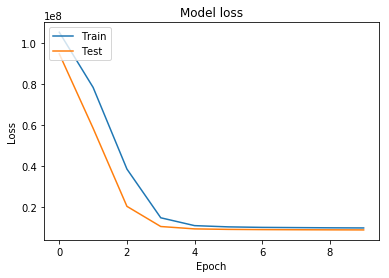

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 10,049
Trainable params: 10,049
Non-trainable params: 0
_________________________________________________________________
RMSE after training: 2999.81116776252


In [7]:
#Build, tran, and optimize a neural network
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.optimizers import SGD, Adam
from keras.losses import mean_squared_error
from keras.initializers import RandomNormal
from math import sqrt
from tensorflow.random import set_random_seed

set_random_seed(764)

import matplotlib.pyplot as plt
%matplotlib inline

def train(x_train,
          y_train,
          x_test, 
          y_test,
          epochs, 
          batch_size, 
          hidden_layer_nodes, 
          hidden_activation, 
          hidden_dropout, 
          regularizer,
          optimizer,
          initializer
          ):

    model = Sequential()
    
    model.add(Dense(hidden_layer_nodes[0],
                    input_dim=90,
                    activation = hidden_activation,
                    kernel_initializer = initializer,
                    kernel_regularizer = regularizer,
                    bias_initializer='zeros'))
    
    if (hidden_dropout > 0):
        model.add(Dropout(hidden_dropout))
    
    for i in range(1, len(hidden_layer_nodes)):
        model.add(
            Dense(hidden_layer_nodes[i], 
                activation = hidden_activation, 
                kernel_initializer=initializer, 
                kernel_regularizer = regularizer,
                bias_initializer='zeros'))
        
        if (hidden_dropout > 0):
            model.add(Dropout(hidden_dropout))
    
    model.add(Dense(1, kernel_initializer=initializer))
    
    model.compile(loss=mean_squared_error, optimizer = optimizer)
    
    trained = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
    
    return trained, model

#Set some hyperparameters
epochs = 10
batch_size = 2048
hidden_layer_nodes = [64, 64]
hidden_activation = 'relu'
hidden_dropout = .1
regularizer = l1(.01)
optimizer = SGD(lr=1, clipnorm=.05)
initializer = RandomNormal(mean=0, stddev=.5, seed=764)
    
trained, model = train(x_train, y_train, x_test, y_test, epochs, 
      batch_size, hidden_layer_nodes, hidden_activation, 
      hidden_dropout, regularizer, optimizer, initializer)

      
# Plot training & validation loss values
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.summary()

print('RMSE after training: %s' % sqrt(float(trained.history['val_loss'][-1])))